#Monte Carlo with Weibull distribution

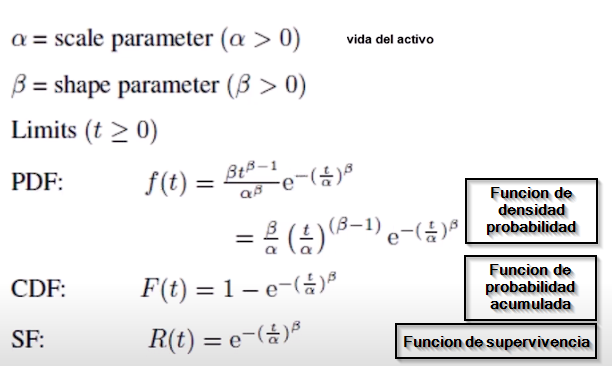

#Instalacion de librerias necesarias(weibull,matplotlib,pandas,numpy)

In [25]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P,Fit_Weibull_3P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import weibull_min

Simulacion de data weibull(Generamos datos aleatorios de acuerdos a parametros weibull)

In [17]:
#Parametros del modelo weibull
a=30 # escala (scale)(vida caracteristica)
b=2.5 #forma (shape)
g=100 #loc (time, donde empieza a generar los datos)
dist = Weibull_Distribution(alpha=a, beta=b, gamma=g )#creamos el objeto de distribucion
data = dist.random_samples(500, seed=2) #Generamos los datos de tiempo entre fallas(time between failure:tbf)
data.shape 
data[:10]


array([124.00433604, 106.99670641, 127.40751789, 123.98434403,
       123.53938167, 120.81465531, 116.63541612, 129.58368535,
       119.85134405, 118.78777575])

Creamos dataframe con los datos de tiempo

In [18]:
tiempos =pd.DataFrame(data)
tiempos.columns=["TBF"]
tiempos.head()



,TBF
0,124.004
1,106.997
2,127.408
3,123.984
4,123.539


Creamos la grafica de los datos de tiempo en un instograma

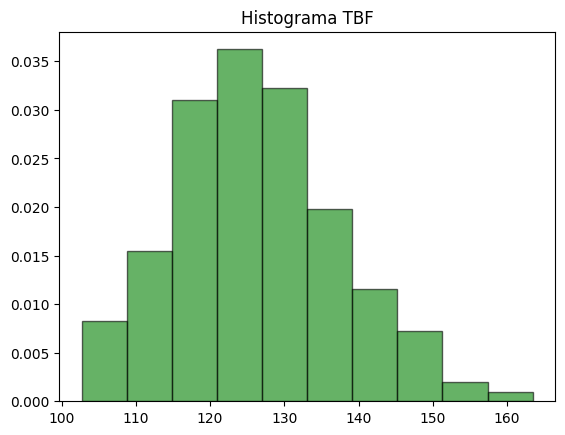

In [22]:
Inter=10
plt.hist(data, bins = Inter, density=True,alpha=0.6, color='g',edgecolor='black')
plt.title("Histograma TBF")
plt.show()

Con el dataframe estimamos ajustamos los parametros  para la determinacion de parametros(METODO 1)

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 500/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.9044        0.549771   27.8467   30.0023
     Beta           2.475       0.0864023   2.31132   2.65028
    Gamma         100.667         1.14172   98.4543    102.93 

Goodness of fit    Value
 Log-likelihood -1901.38
           AICc  3808.81
            BIC  3821.41
             AD 0.242561 



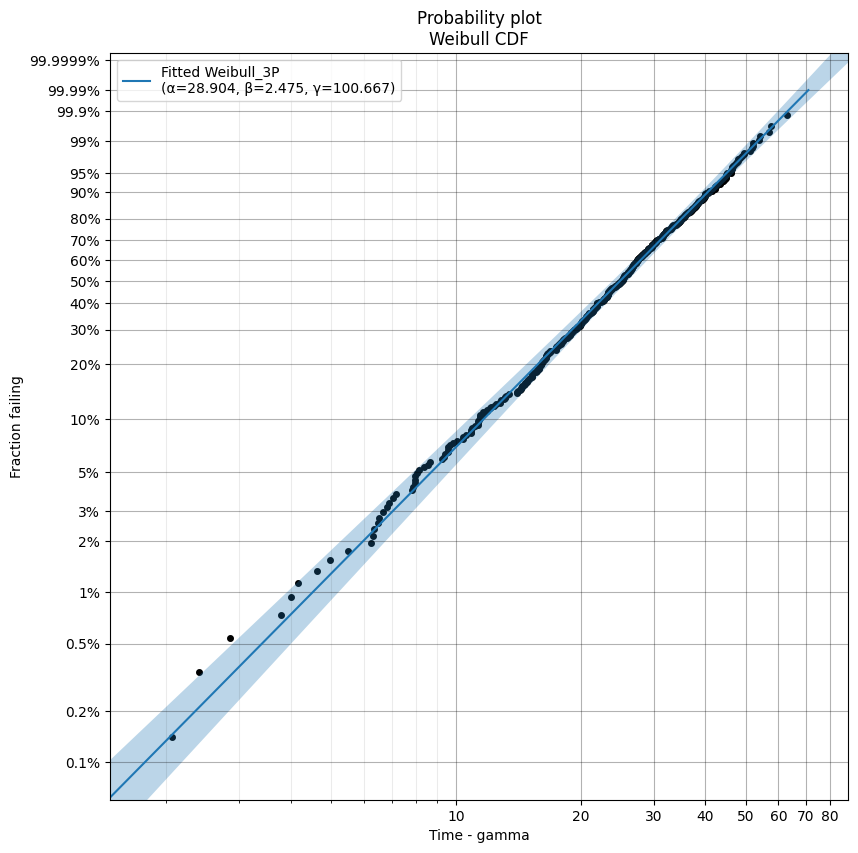

In [24]:
fit=Fit_Weibull_3P(failures=data,print_results=True,show_probability_plot=True)
#En la grafica siguiente se puede apreciar que el modelo teorico weibull de la probabilidad acumulada asignado por
#se asemeja mucho a las de nuestros datos, por lo cual ya contruimos nuestro modelo de confiabilidad y podemos predecir
#datos en el interbalo que se desee.

Estimacion de parametros weibull (metodo 2)

In [26]:
#fit de la data en una distribucion weibull
shape, loc, scale = weibull_min.fit(data)
shape,loc,scale
#Notamos que los parametros alpha, beta y gamma son similares al metodo 1 por lo cual
#este metodo tambien te proporciona la adquisicion de los parametros weibull para la data que se desee

(2.4750052124455957, 100.66734630592542, 28.90442005582215)

Comparamos el modelo generado con los datos del histograma general graficada al inicio

<function matplotlib.pyplot.show(close=None, block=None)>

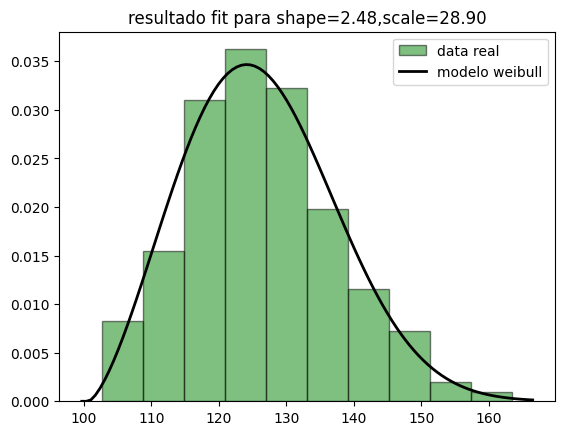

In [27]:
plt.hist(data, bins = Inter, density=True,alpha=0.5, color='g',edgecolor='black',label='data real')
#Graficamos la curva de la densidad de probablidad PDF
xmin, xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=weibull_min.pdf(x,shape,loc,scale)
plt.plot(x,p,'k',linewidth=2,label='modelo weibull')
title="resultado fit para shape=%.2f,scale=%.2f"%(shape,scale)
plt.title(title)
plt.legend()
plt.show

Modelo generado de la densidad de probabilidad (pdf), con esto podemos calcular la probabilidad de falla entre intervalos tiempo

In [28]:
#calculamos la probabilidad de falla entre 2 limites 120 a 130
pmin=weibull_min.cdf(120,shape,loc,scale)#probabiliadad a 120
pmax=weibull_min.cdf(130,shape,loc,scale)#probabiliadad a 130
print(pmax-pmin)
pmin1=weibull_min.cdf(100,shape,loc,scale)#probabiliadad a 100
pmax1=weibull_min.cdf(160,shape,loc,scale)#probabiliadad a 160
pmax1-pmin1 #el area bajo la curva es la probabilidad entre intervalos, en este caso es
#toda la curva por lo que la suma sera proximo a 1.
print(pmax1-pmin1)

0.336547116353267
0.997340155716195


La curva de probabilidad acumulada de falla y de confiabialidad

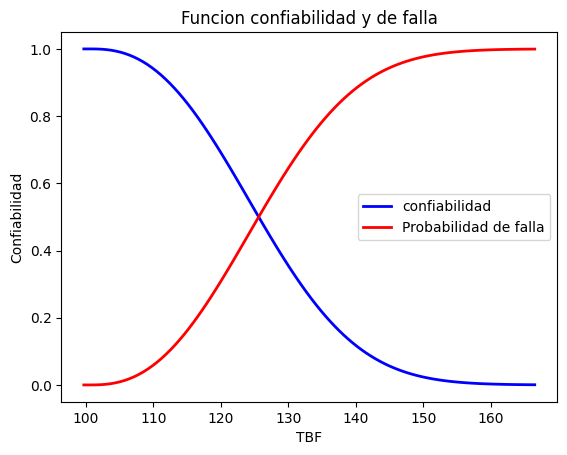

In [29]:
y_confiabilidad =weibull_min.sf(x,shape,loc,scale)
y_probabilidadfalla =weibull_min.cdf(x,shape,loc,scale)
plt.plot(x,y_confiabilidad,'b',linewidth=2,label='confiabilidad')
plt.plot(x,y_probabilidadfalla,'r',linewidth=2,label='Probabilidad de falla')
plt.title('Funcion confiabilidad y de falla')
plt.xlabel('TBF')
plt.ylabel('Confiabilidad')
plt.legend()
plt.show()